# Latent Semantic Analysis

In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [2]:
nltk_data_path = '/media/raul/Data/nltk_data'
nltk.data.path.append(nltk_data_path)

## 1. Import Data & Vectorization

In [3]:
wordnet_lemmatizer = WordNetLemmatizer()

In [4]:
data_path = '/home/raul/Documents/udemy/datas_cience_nlp/latent_semantic_analysis/all_book_titles.txt'
titles = [line.rstrip() for line in open(data_path)]

In [5]:
path_stopwords = '/home/raul/Documents/udemy/datas_cience_nlp/stopwords.txt'
STOP_WORDS = set(w.rstrip() for w in open(path_stopwords))
STOP_WORDS = STOP_WORDS.union({'introduction', 'edition', 'series', 'application',
                               'approach', 'card', 'access', 'package', 'plus', 'etext',
                               'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
                               'third', 'second', 'fourth',})

In [6]:
def my_tokenizer(s):
    """
    Tokenize an input string
    
    :param s: input string which represents several lines / paragraph
    :return: list containing all the tokens
    """
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in STOP_WORDS]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [7]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []

In [8]:
for title in titles:    
    try:
#         title = title.encode('ascii', 'ignore')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in index_word_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except:
        pass

In [9]:
print(len(all_tokens))

2373


In [10]:
def tokens_to_vector(tokens, word_index_map):
    """
    Returns the vectorized format of an observation,
    including features

    :param tokens: tokens corresponding to the observation
    :param word_index_map: dictionary which contains the strings-to-index 
    map
    :return: numpy array containing the vectorized representation
    of the observation (including features)
    """
    
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

In [11]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N))
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens, word_index_map)
    i += 1

In [12]:
print(X)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


## 2. Dimensionality Reduction

In [13]:
svd = TruncatedSVD()
Z = svd.fit_transform(X)

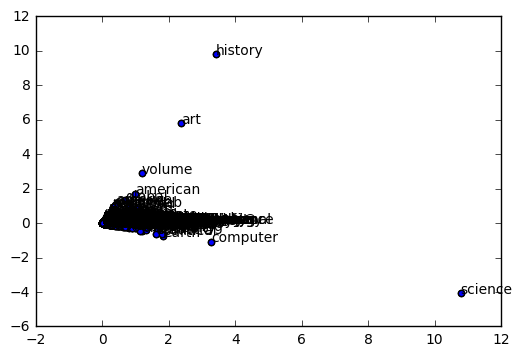

In [18]:
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()